### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


### Ingresos Totales por cada Tienda

In [3]:
ingreso1 = pd.to_numeric(tienda["Precio"], errors='coerce').sum() # pd.to_numeric() convierte automáticamente la columna 'Precio' a números:
ingreso2 = pd.to_numeric(tienda2["Precio"], errors='coerce').sum() # errors='coerce' convierte cualquier valor no convertible a NaN (que se ignora en la suma).
ingreso3 = pd.to_numeric(tienda3["Precio"], errors='coerce').sum()
ingreso4 = pd.to_numeric(tienda4["Precio"], errors='coerce').sum()

print(f'Ingreso total de la Tienda 1: ${ingreso1:,.2f}')
print(f'Ingreso total de la Tienda 2: ${ingreso2:,.2f}')
print(f'Ingreso total de la Tienda 3: ${ingreso3:,.2f}')
print(f'Ingreso total de la Tienda 4: ${ingreso4:,.2f}\n')

ingresos_totales_tiendas = ingreso1 + ingreso2 + ingreso3 + ingreso4
print(f'Ingresos totales de las 4 tiendas: ${ingresos_totales_tiendas:,.2f}')

Ingreso total de la Tienda 1: $1,150,880,400.00
Ingreso total de la Tienda 2: $1,116,343,500.00
Ingreso total de la Tienda 3: $1,098,019,600.00
Ingreso total de la Tienda 4: $1,038,375,700.00

Ingresos totales de las 4 tiendas: $4,403,619,200.00


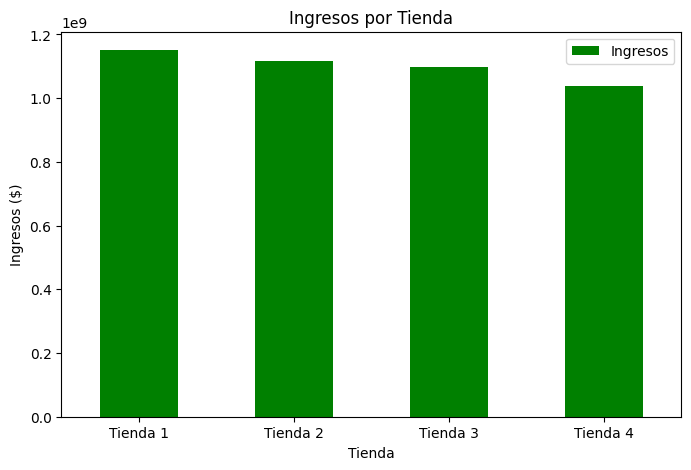

In [4]:
grafico_ingresos_tiendas = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingresos': [ingreso1, ingreso2, ingreso3, ingreso4]})
grafico_ingresos_tiendas.plot(kind='bar', figsize=(8,5), color='green', x='Tienda', y='Ingresos', legend=True)
plt.title('Ingresos por Tienda')
plt.ylabel('Ingresos ($)')
plt.xlabel('Tienda')
plt.xticks(rotation=0)
plt.show()

# 2. Ventas por categoría

Descripción

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [5]:
tienda.head(3)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444


In [6]:
tiendas_datos = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Diccionario para almacenar resultados
resultados = {}

for nombre, df in tiendas_datos.items():
    
    ventas = df['Categoría del Producto'].value_counts().reset_index()
    ventas.columns = ['Categoría del Producto', 'Cantidad de Ventas']
    ventas = ventas.sort_values('Cantidad de Ventas', ascending=False)
    resultados[nombre] = ventas

# Mostrar tablas
print("*** VENTAS POR CATEGORÍA EN CADA TIENDA ***\n")
for nombre, df_ventas in resultados.items():
    print(f"\n{nombre}:")
    print(df_ventas.to_string(index=False))
    

*** VENTAS POR CATEGORÍA EN CADA TIENDA ***


Tienda 1:
 Categoría del Producto  Cantidad de Ventas
                Muebles                 465
           Electrónicos                 448
               Juguetes                 324
      Electrodomésticos                 312
   Deportes y diversión                 284
 Instrumentos musicales                 182
                 Libros                 173
Artículos para el hogar                 171

Tienda 2:
 Categoría del Producto  Cantidad de Ventas
                Muebles                 442
           Electrónicos                 422
               Juguetes                 313
      Electrodomésticos                 305
   Deportes y diversión                 275
 Instrumentos musicales                 224
                 Libros                 197
Artículos para el hogar                 181

Tienda 3:
 Categoría del Producto  Cantidad de Ventas
                Muebles                 499
           Electrónicos                 45

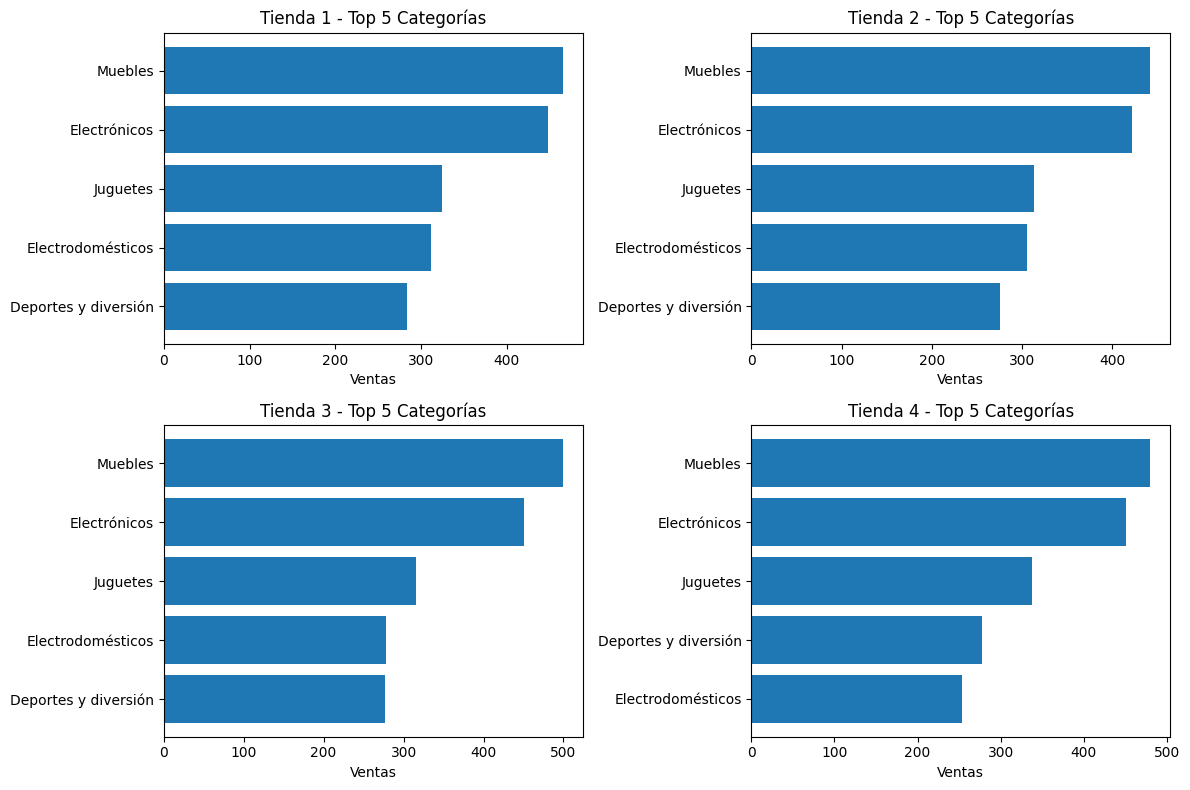

In [7]:
# Visualización 1: Barras horizontales
plt.figure(figsize=(12, 8))

for idx, (nombre, df_ventas) in enumerate(resultados.items(), 1):
    plt.subplot(2, 2, idx)
    
    # Tomar las 5 categorías principales
    top_5 = df_ventas.head(5)
    
    plt.barh(top_5['Categoría del Producto'], top_5['Cantidad de Ventas'])
    plt.title(f'{nombre} - Top 5 Categorías')
    plt.xlabel('Ventas')
    
    # Invertir eje Y para que la mayor esté arriba
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


Descripción

En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [8]:
tienda.head(3)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444


In [9]:
tienda_datos = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

resultado_promedios = {}

for nombre_tienda, df in tienda_datos.items():
    # Calculamos el promedio y lo convertimos en un DataFrame
    promedio = df["Calificación"].mean().round(2)
    # Creamos un DataFrame con una fila y una columna
    calificaciones_df = pd.DataFrame({"Calificación": [promedio]})
    resultado_promedios[nombre_tienda] = calificaciones_df
    
print("***Calificaion de los clientes por Tienda***")

for nombre, df_calificacion in resultado_promedios.items():
    print(f'\n{nombre}:')
    print(df_calificacion.to_string(index=False)) 

***Calificaion de los clientes por Tienda***

Tienda 1:
 Calificación
         3.98

Tienda 2:
 Calificación
         4.04

Tienda 3:
 Calificación
         4.05

Tienda 4:
 Calificación
          4.0


# 4. Productos más y menos vendidos

Descripción

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [10]:
def analizar_tienda_top_bottom(nombre, datos, n=1):
    conteo = datos['Producto'].value_counts()
    
    print(f"{nombre}:")
    
    # Top n productos
    top_n = conteo.head(n)
    print(f"Top {n} productos más vendidos:")
    for i, (producto, ventas) in enumerate(top_n.items(), 1):
        print(f"  {i}. {producto}: {ventas} ventas")
    
    # Bottom n productos
    bottom_n = conteo.tail(n)
    print(f"\nTop {n} productos menos vendidos:")
    for i, (producto, ventas) in enumerate(bottom_n.items(), 1):
        print(f"  {i}. {producto}: {ventas} ventas")
    
    print()

# Analizar cada tienda con top 3 y bottom 3
analizar_tienda_top_bottom("Tienda 1", tienda, 3)
analizar_tienda_top_bottom("Tienda 2", tienda2, 3)
analizar_tienda_top_bottom("Tienda 3", tienda3, 3)
analizar_tienda_top_bottom("Tienda 4", tienda4, 3)

Tienda 1:
Top 3 productos más vendidos:
  1. Microondas: 60 ventas
  2. TV LED UHD 4K: 60 ventas
  3. Armario: 60 ventas

Top 3 productos menos vendidos:
  1. Olla de presión: 35 ventas
  2. Auriculares con micrófono: 33 ventas
  3. Celular ABXY: 33 ventas

Tienda 2:
Top 3 productos más vendidos:
  1. Iniciando en programación: 65 ventas
  2. Microondas: 62 ventas
  3. Batería: 61 ventas

Top 3 productos menos vendidos:
  1. Mesa de comedor: 34 ventas
  2. Impresora: 34 ventas
  3. Juego de mesa: 32 ventas

Tienda 3:
Top 3 productos más vendidos:
  1. Kit de bancas: 57 ventas
  2. Mesa de comedor: 56 ventas
  3. Cama king: 56 ventas

Top 3 productos menos vendidos:
  1. Mochila: 36 ventas
  2. Microondas: 36 ventas
  3. Bloques de construcción: 35 ventas

Tienda 4:
Top 3 productos más vendidos:
  1. Cama box: 62 ventas
  2. Cubertería: 59 ventas
  3. Dashboards con Power BI: 56 ventas

Top 3 productos menos vendidos:
  1. Guitarra acústica: 37 ventas
  2. Armario: 34 ventas
  3. Guitar

# 5. Envío promedio por tienda

Descripción

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [11]:
tienda.head(3)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444


In [12]:
envios_promedio1 = tienda["Costo de envío"].mean()
envios_promedio2 = tienda2["Costo de envío"].mean()
envios_promedio3 = tienda3["Costo de envío"].mean()
envios_promedio4 = tienda4["Costo de envío"].mean()

print("=== COSTO DE ENVÍO PROMEDIO POR TIENDA ===")
print(f"Tienda 1: ${envios_promedio1:.2f}") 
print(f"Tienda 2: ${envios_promedio2:.2f}")
print(f"Tienda 3: ${envios_promedio3:.2f}") 
print(f"Tienda 4: ${envios_promedio4:.2f}")        


=== COSTO DE ENVÍO PROMEDIO POR TIENDA ===
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


### Desafio Extra

Descripción

Esta actividad es un extra, por lo tanto es OPCIONAL.

En este extra, tendrás el desafío de explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.

Desafío:

    Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

    Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

    Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

Sugerencias:

    Puede utilizar la biblioteca Matplotlib para gráficos de dispersión o incluso integrarla con otras bibliotecas como Folium para generar mapas interactivos si desea ir más allá.

    Analice cómo las variables geográficas influyen en los ingresos y las calificaciones de las tiendas.

In [ ]:
# Verificando el total de filas de los DataFrames

print(tienda.shape)
print(tienda2.shape)
print(tienda3.shape)
print(tienda4.shape)

(2359, 13)
(2359, 13)
(2359, 13)
(2358, 13)


In [ ]:
# Uniendo los DataFrames en uno solo

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda["Tiendas"] = "Tienda 1"
tienda2["Tiendas"] = "Tienda 2"
tienda3["Tiendas"] = "Tienda 3"
tienda4["Tiendas"] = "Tienda 4"

todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True) # Uniendo las Tiendas en un solo DataFrame

todas_las_tiendas.shape # Verificando el total de filas y columnas



(9435, 13)

In [39]:
todas_las_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tiendas                 9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [40]:
todas_las_tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tiendas
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [ ]:
costo_de_envios = todas_las_tiendas.groupby("Tiendas")["Precio"].mean().round(2)
costo_de_envios

Tiendas
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64

In [59]:
promedio_tienda = todas_las_tiendas.groupby(["Tiendas", "Lugar de Compra"])
promedio_tienda.groups

{('Tienda 1', 'Armenia'): [148, 319, 475, 536, 569, 684, 781, 975, 1189, 1728, 2015, 2037, 2043, 2316], ('Tienda 1', 'Barranquilla'): [28, 80, 159, 223, 246, 258, 304, 330, 347, 355, 388, 497, 509, 530, 535, 576, 611, 621, 630, 644, 680, 740, 744, 791, 855, 889, 895, 977, 979, 984, 997, 1050, 1051, 1061, 1099, 1150, 1177, 1195, 1247, 1268, 1365, 1386, 1389, 1420, 1456, 1494, 1580, 1692, 1753, 1767, 1804, 1827, 1832, 1840, 1854, 1915, 1938, 1955, 1961, 1966, 1979, 1989, 2025, 2052, 2071, 2102, 2121, 2127, 2166, 2167, 2181, 2264, 2281, 2297, 2326], ('Tienda 1', 'Bogotá'): [0, 6, 8, 9, 10, 14, 18, 21, 23, 25, 27, 29, 33, 34, 36, 38, 43, 44, 52, 55, 57, 58, 61, 63, 64, 69, 70, 74, 75, 79, 81, 86, 88, 89, 91, 92, 97, 100, 102, 103, 104, 106, 108, 109, 110, 111, 112, 113, 114, 115, 119, 121, 124, 125, 131, 134, 138, 139, 141, 151, 157, 158, 161, 162, 163, 164, 170, 172, 176, 177, 179, 181, 183, 187, 188, 190, 192, 193, 195, 196, 197, 200, 201, 204, 205, 206, 207, 210, 211, 212, 213, 214, 215

In [60]:
juntar = promedio_tienda.agg(
    {
    "Precio": "mean"
}
    )

juntar

Precio
Tiendas  Lugar de Compra               
Tienda 1 Armenia          329692.857143
         Barranquilla     438769.333333
         Bogotá           447159.552846
         Bucaramanga      567070.967742
         Cali             545914.134276
...                                 ...
Tienda 4 Riohacha         538288.636364
         Santa Marta      377674.285714
         Soacha           787250.000000
         Valledupar       264250.000000
         Villavicencio    226657.142857

[76 rows x 1 columns]